<a href="https://colab.research.google.com/github/GabrilaGladis/ML-project/blob/main/plantleaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics
!pip install matplotlib
!pip install opencv-python-headless

import os
import zipfile

# Unzipping the uploaded file (Assuming the file is uploaded to '/mnt/data/')
zip_file_path = '/content/archive (2) (2).zip'
extract_dir = '/content/dataset/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")


Files extracted to /content/dataset/


In [ ]:
from ultralytics import YOLO

# Load the YOLOv8 model (pre-trained)
model = YOLO('yolov8n.pt')  # yolov8n.pt is the smallest and fastest model

# Training the model on your dataset (assuming dataset is in YOLO format)
model.train(data=f'{extract_dir}/data.yaml', epochs=5, imgsz=640)

# Save the trained model
model.save('plant_disease_yolov8.pt')


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.4MB/s]


Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset//data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_bo

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=7

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/dataset/train/labels... 645 images, 18 backgrounds, 0 corrupt: 100%|██████████| 645/645 [00:00<00:00, 1372.68it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.16 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 61 images, 2 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<00:00, 1657.36it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      1.537      3.537      1.258         33        640: 100%|██████████| 41/41 [09:43<00:00, 14.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:21<00:00, 10.60s/it]

                   all         61        196     0.0136      0.223      0.111     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      1.426      2.405       1.21         14        640: 100%|██████████| 41/41 [09:16<00:00, 13.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.91s/it]

                   all         61        196      0.862      0.141      0.247      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      1.417      2.186       1.17         22        640: 100%|██████████| 41/41 [09:20<00:00, 13.68s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.12s/it]

                   all         61        196      0.719      0.228      0.271      0.179



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      1.303      1.941      1.144         15        640: 100%|██████████| 41/41 [09:14<00:00, 13.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:19<00:00,  9.89s/it]

                   all         61        196      0.396       0.35      0.323       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      1.271       1.82      1.132         27        640: 100%|██████████| 41/41 [09:25<00:00, 13.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.41s/it]

                   all         61        196      0.731      0.318       0.34      0.241



5 epochs completed in 0.815 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3,007,013 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:17<00:00,  8.87s/it]


                   all         61        196       0.73      0.317       0.34      0.242
        Bacterial Spot          3          4          0          0     0.0234      0.012
          Early_Blight         31         96       0.61      0.685      0.662      0.327
               Healthy         19         19      0.945      0.947      0.988      0.863
           Late_blight         13         29      0.555      0.586      0.557      0.426
             Leaf Mold          4          7          1          0          0          0
           Target_Spot          5          6          1          0     0.0202    0.00823
            black spot         21         35          1          0      0.133     0.0596
Speed: 4.6ms preprocess, 261.8ms inference, 0.0ms loss, 14.6ms postprocess per image
Results saved to runs/detect/train


In [ ]:
# Load the best model after training
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Path to the best model after training

# Perform predictions on the validation set or any test images
results = model.predict(source='/content/dataset/test/images', save=True, conf=0.25)  # Change source to your test images

# Visualize the results
from IPython.display import Image, display
import glob

# Display all saved images with predictions
image_paths = glob.glob('/content/runs/detect/predict/*.jpg')  # Path where YOLOv8 saves predictions

for img_path in image_paths:
    display(Image(filename=img_path))



image 1/31 /content/dataset/test/images/IMG_0219_JPG.rf.c8d288f364390a28656a50ed7415713a.jpg: 640x640 1 Healthy, 231.0ms
image 2/31 /content/dataset/test/images/IMG_0233_JPG.rf.b27c3e2dd843cab5e0f652fd1ce5659a.jpg: 640x640 2 Early_Blights, 231.6ms
image 3/31 /content/dataset/test/images/IMG_0249_JPG.rf.412df0b52b549fc121a346eb8a957ab0.jpg: 640x640 (no detections), 241.4ms
image 4/31 /content/dataset/test/images/IMG_0277_JPG.rf.84073f240decbc79e30716373f3dd507.jpg: 640x640 3 Early_Blights, 237.3ms
image 5/31 /content/dataset/test/images/IMG_0281_JPG.rf.a29c913abceeed1ea6092ab0f2c92b0d.jpg: 640x640 1 Early_Blight, 222.9ms
image 6/31 /content/dataset/test/images/IMG_0288_JPG.rf.ca824ec09b29571c39dc6b6ee6b0f6a7.jpg: 640x640 1 Early_Blight, 218.3ms
image 7/31 /content/dataset/test/images/IMG_0299_JPG.rf.d19f0cf7d3997c407f195ae8c59cd046.jpg: 640x640 (no detections), 226.6ms
image 8/31 /content/dataset/test/images/IMG_0300_JPG.rf.9294551b97cedde7e681b52876aed944.jpg: 640x640 1 Healthy, 243.2

In [ ]:
from ultralytics import YOLO

# Load the best YOLOv8 model (replace with your model path)
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Use the path where your trained model is saved


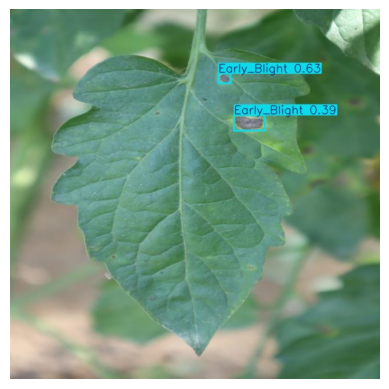

In [ ]:
# Assuming the image is already in your Colab environment
image_path = '/content/runs/detect/predict4/IMG_0477_JPG.rf.d15279ca8c2eb40f58a44dcef84e5660.jpg'

# Display the image (optional, just to ensure it's the right one)
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # Turn off axis for better display
plt.show()


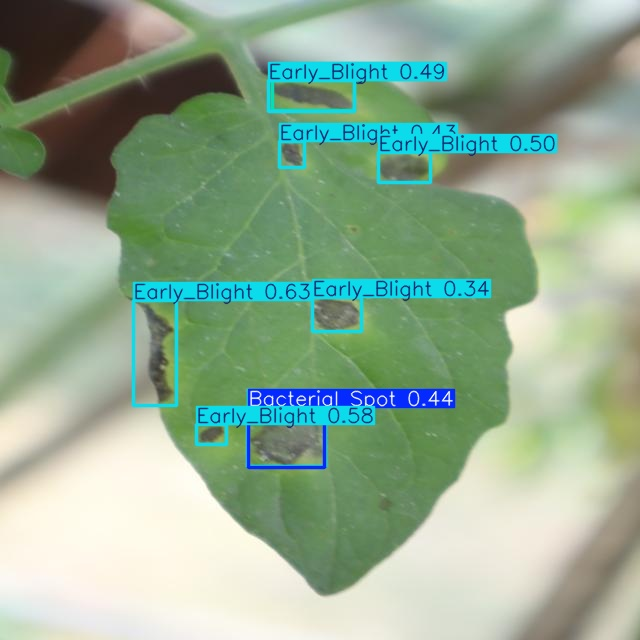

In [ ]:
from IPython.display import Image as IPyImage, display

# Path to the saved image with predictions
predicted_image_path = '/content/runs/detect/predict3/IMG_0581_JPG.rf.303c1f0a2504708e64a37c20cf3e0d58.jpg'

# Display the saved image with predictions
display(IPyImage(filename=predicted_image_path))

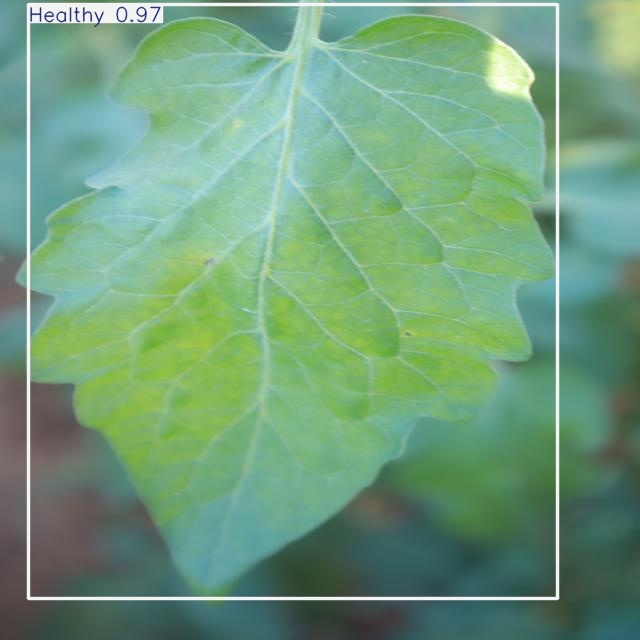

In [ ]:
from IPython.display import Image as IPyImage, display

# Path to the saved image with predictions
predicted_image_path = '/content/runs/detect/predict3/IMG_1010_JPG.rf.f7e96ee6ab8dac362cf69f15bbac8924.jpg'

# Display the saved image with predictions
display(IPyImage(filename=predicted_image_path))

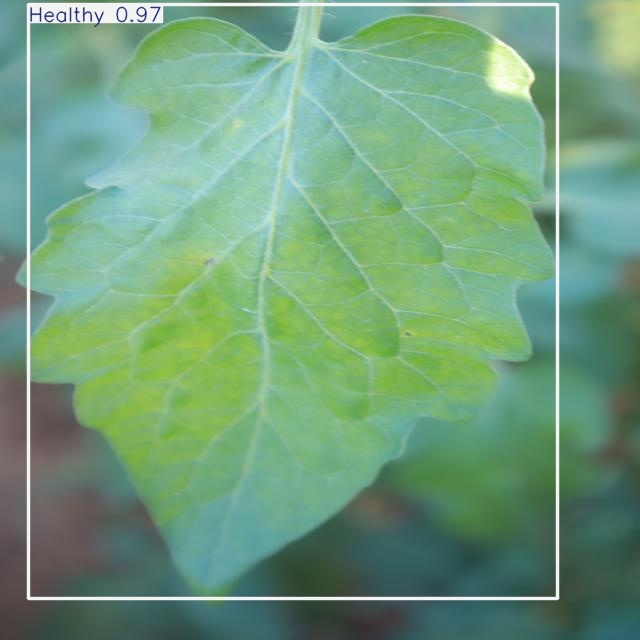

In [ ]:
from IPython.display import Image as IPyImage, display

# Path to the saved image with predictions
predicted_image_path = '/content/runs/detect/predict3/IMG_1010_JPG.rf.f7e96ee6ab8dac362cf69f15bbac8924.jpg'

# Display the saved image with predictions
display(IPyImage(filename=predicted_image_path))


In [ ]:
# Iterate through the results
for result in results:
    boxes = result.boxes  # Bounding boxes
    confs = result.boxes.conf  # Confidence scores
    labels = result.boxes.cls  # Class labels

    # Print the predictions
    print("Detected boxes:", boxes.xyxy)
    print("Confidence scores:", confs)
    print("Class labels:", labels)


Detected boxes: tensor([[360.9180, 111.2134, 381.8684, 128.4233],
        [387.3765, 183.5964, 440.9734, 210.3491]])
Confidence scores: tensor([0.6261, 0.3853])
Class labels: tensor([1., 1.])


In [ ]:
# Run evaluation on the validation set or test set
metrics = model.val(data='/content/dataset/data.yaml')  # Replace with the path to your data.yaml

# Print the evaluation metrics
print(metrics)


Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)


val: Scanning /content/dataset/valid/labels.cache... 61 images, 2 backgrounds, 0 corrupt: 100%|██████████| 61/61 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:23<00:00,  5.90s/it]


                   all         61        196       0.73      0.317       0.34      0.242
        Bacterial Spot          3          4          0          0     0.0234      0.012
          Early_Blight         31         96       0.61      0.685      0.662      0.327
               Healthy         19         19      0.945      0.947      0.988      0.863
           Late_blight         13         29      0.555      0.586      0.557      0.426
             Leaf Mold          4          7          1          0          0          0
           Target_Spot          5          6          1          0     0.0202    0.00823
            black spot         21         35          1          0      0.133     0.0596
Speed: 6.5ms preprocess, 350.2ms inference, 0.0ms loss, 15.3ms postprocess per image
Results saved to runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: 